In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn import metrics, mixture, cluster
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

In [2]:
data = pd.read_csv(r'C:\Users\psrin\OneDrive - The University of Texas at Dallas\Desktop\Srini UTD\BUAN 6341\Assignment\SeoulBikeData.csv',encoding = 'unicode_escape',index_col=0)

In [3]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
data.columns = ['rented_bike_count', 'hour','temperature_in_c','humidity_percentage','wind_speed_mps','visibility_10m','dew_point_temperature_in_c','solar_radiation','rainfall_mm','snowfall_cm','seasons','holiday','functioning_day']

In [5]:
data.loc[data["rented_bike_count"] < 704.602, "rented_bike_count"] = 0
data.loc[data["rented_bike_count"] >= 704.602, "rented_bike_count"] = 1
data.loc[data["seasons"] == "Spring", "seasons"] = 1
data.loc[data["seasons"] == "Summer", "seasons"] = 2
data.loc[data["seasons"] == "Autumn", "seasons"] = 3
data.loc[data["seasons"] == "Winter", "seasons"] = 4
data.loc[data["functioning_day"] == "Yes", "functioning_day"] = 1
data.loc[data["functioning_day"] == "No", "functioning_day"] = 0
data.loc[data["holiday"] == "Holiday", "holiday"] = 1
data.loc[data["holiday"] == "No Holiday", "holiday"] = 0

In [6]:
data['rented_bike_count'].value_counts()

0    5238
1    3522
Name: rented_bike_count, dtype: int64

In [7]:
data = data.reset_index(drop=True)
data.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12]
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1
1,0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1
2,0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1
3,0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0,1
4,0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0,1


In [8]:
x = data[[1,2,3,4,5,6,7,8,9,10,11,12]].values
y = data[[0]].values
x_train, x_test = x[:6132,:], x[6132:,:]
print(x_train.shape, x_test.shape)
y_train, y_test = y[:6132,:], y[6132:,:]
print(y_train.shape, y_test.shape)

(6132, 12) (2628, 12)
(6132, 1) (2628, 1)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_sc = scaler.fit_transform(x)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### K-Means Clustering

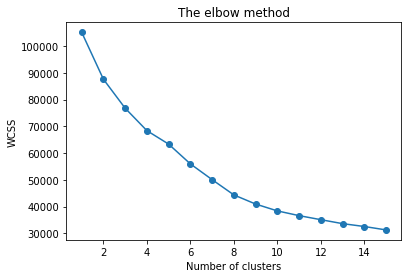

In [12]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)
    kmeans.fit(x_sc)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 16), wcss, "o-")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_sc)

In [14]:
y_kmeans

array([3, 3, 3, ..., 3, 3, 3])

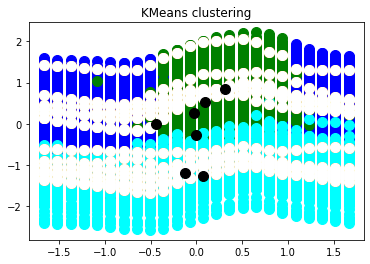

In [15]:
plt.scatter(x_sc[y_kmeans==0, 0], x_sc[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x_sc[y_kmeans==1, 0], x_sc[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x_sc[y_kmeans==2, 0], x_sc[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(x_sc[y_kmeans==3, 0], x_sc[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(x_sc[y_kmeans==4, 0], x_sc[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(x_sc[y_kmeans==4, 0], x_sc[y_kmeans==4, 1], s=100, c='yellow', label ='Cluster 6')
plt.scatter(x_sc[y_kmeans==4, 0], x_sc[y_kmeans==4, 1], s=100, c='white', label ='Cluster 7')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label = 'Centroids')
plt.title('KMeans clustering')
plt.show()

#### PCA

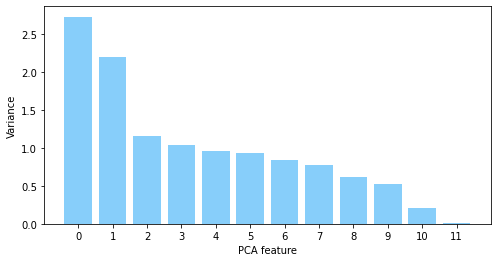

In [16]:
from sklearn.decomposition import PCA
pca = PCA(random_state=123)
pca.fit(x_sc)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

In [17]:
from sklearn.decomposition import PCA

np.random.seed(0)
pca= PCA(n_components=2)

x_pca = pca.fit_transform(x_sc)

#### K-Means after PCA

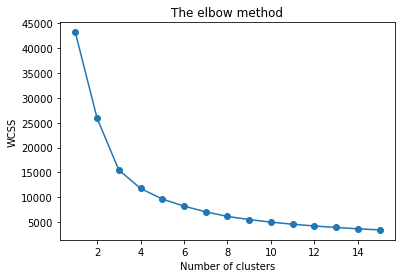

In [18]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 16), wcss, "o-")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [101]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_pca = kmeans.fit_predict(x_pca)

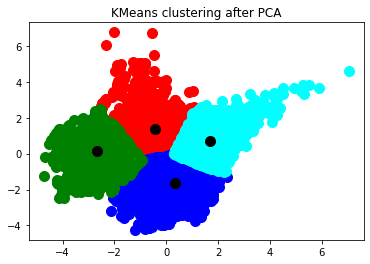

In [102]:
plt.scatter(x_pca[y_kmeans_pca==0, 0], x_pca[y_kmeans_pca==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x_pca[y_kmeans_pca==1, 0], x_pca[y_kmeans_pca==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x_pca[y_kmeans_pca==2, 0], x_pca[y_kmeans_pca==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(x_pca[y_kmeans_pca==3, 0], x_pca[y_kmeans_pca==3, 1], s=100, c='cyan', label ='Cluster 4')
#plt.scatter(x_pca[y_kmeans_pca==4, 0], x_pca[y_kmeans_pca==4, 1], s=100, c='magenta', label ='Cluster 5')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label = 'Centroids')
plt.title('KMeans clustering after PCA')
plt.show()

#### ICA

In [10]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)

x_ica = ica.fit_transform(x_sc)

C:\Users\psrin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


#### K-Means after ICA

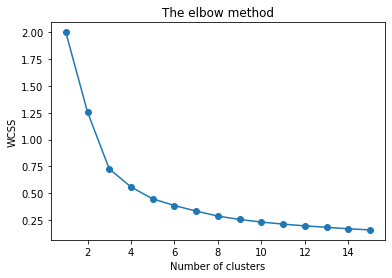

In [22]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)
    kmeans.fit(x_ica)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 16), wcss, "o-")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [99]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_ica = kmeans.fit_predict(x_ica)

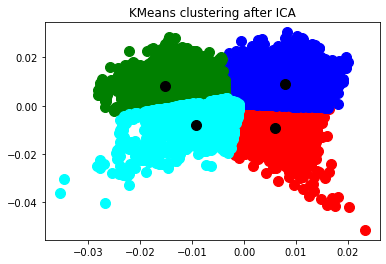

In [100]:
plt.scatter(x_ica[y_kmeans_ica==0, 0], x_ica[y_kmeans_ica==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x_ica[y_kmeans_ica==1, 0], x_ica[y_kmeans_ica==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x_ica[y_kmeans_ica==2, 0], x_ica[y_kmeans_ica==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(x_ica[y_kmeans_ica==3, 0], x_ica[y_kmeans_ica==3, 1], s=100, c='cyan', label ='Cluster 4')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label = 'Centroids')
plt.title('KMeans clustering after ICA')
plt.show()

#### Randomized Projections

In [71]:
from sklearn import random_projection

transformer = random_projection.GaussianRandomProjection(n_components=2)
x_rp = transformer.fit_transform(x_sc)

#### K-Means after Randomized Projection

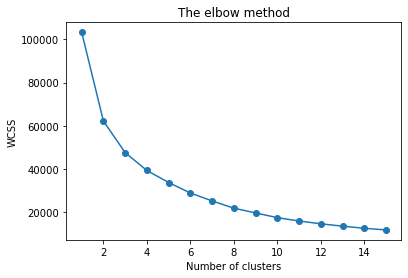

In [72]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)
    kmeans.fit(x_rp)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 16), wcss, "o-")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [103]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_rp = kmeans.fit_predict(x_rp)

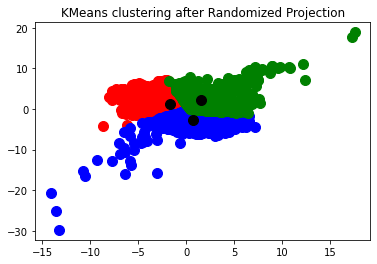

In [104]:
plt.scatter(x_rp[y_kmeans_rp==0, 0], x_rp[y_kmeans_rp==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x_rp[y_kmeans_rp==1, 0], x_rp[y_kmeans_rp==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x_rp[y_kmeans_rp==2, 0], x_rp[y_kmeans_rp==2, 1], s=100, c='green', label ='Cluster 3')
#plt.scatter(x_rp[y_kmeans_rp==3, 0], x_rp[y_kmeans_rp==3, 1], s=100, c='cyan', label ='Cluster 4')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label = 'Centroids')
plt.title('KMeans clustering after Randomized Projection')
plt.show()

### Expectation Maximization

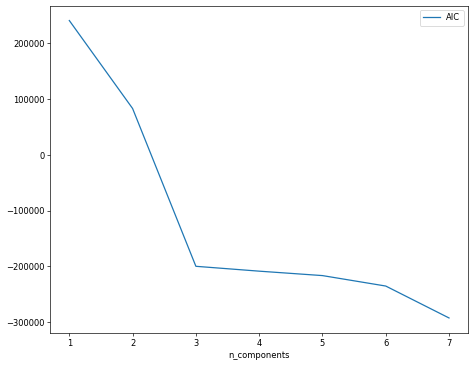

In [25]:
from sklearn import metrics, mixture, cluster
GM_n_components = np.arange(1, 8)
GM_models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(x_sc) for n in GM_n_components]

plt.figure(num=None, figsize=(8, 6), dpi=60, facecolor='w', edgecolor='r')
plt.plot(GM_n_components, [m.aic(x_sc) for m in GM_models], label='AIC')
plt.tight_layout()
plt.legend(loc='best')
plt.xlabel('n_components');

In [26]:
GM_n_classes = 3

GMcluster = mixture.GaussianMixture(n_components=GM_n_classes, covariance_type='full',random_state = 0)
GMcluster_fit = GMcluster.fit(x_sc)
GMlabels = GMcluster_fit.predict(x_sc)

print('Number of clusters: ' + format(len(np.unique(GMlabels))))

Number of clusters: 3


In [27]:
print(GMlabels)

[2 2 2 ... 2 2 2]


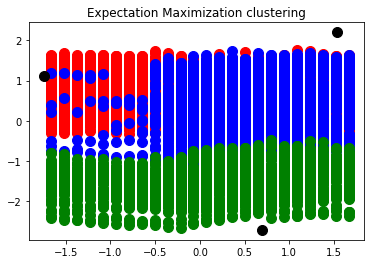

In [105]:
plt.scatter(x_sc[GMlabels==0, 0], x_sc[GMlabels==0, 5], s=100, c='red', label ='Cluster 1')
plt.scatter(x_sc[GMlabels==1, 0], x_sc[GMlabels==1, 5], s=100, c='blue', label ='Cluster 2')
plt.scatter(x_sc[GMlabels==2, 0], x_sc[GMlabels==2, 5], s=100, c='green', label ='Cluster 3')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label = 'Centroids')
plt.title('Expectation Maximization clustering')
plt.show()

#### Expectation Maximization after PCA

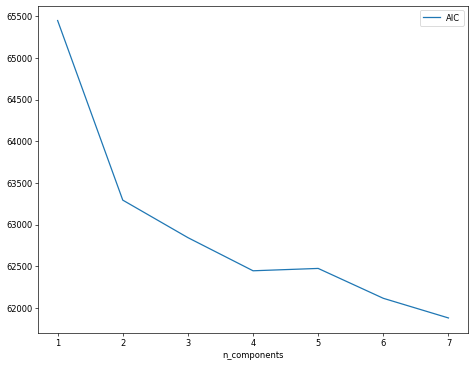

In [29]:
GM_n_components = np.arange(1, 8)
GM_models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(x_pca) for n in GM_n_components]

plt.figure(num=None, figsize=(8, 6), dpi=60, facecolor='w', edgecolor='r')
plt.plot(GM_n_components, [m.aic(x_pca) for m in GM_models], label='AIC')
plt.tight_layout()
plt.legend(loc='best')
plt.xlabel('n_components');

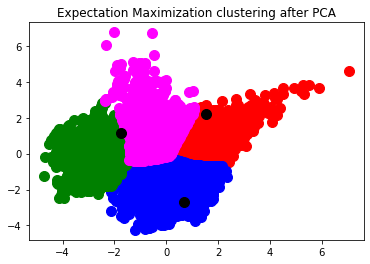

In [106]:
GM_n_classes = 4

GMcluster = mixture.GaussianMixture(n_components=GM_n_classes, covariance_type='full',random_state = 0)
GMcluster_fit = GMcluster.fit(x_pca)
GMlabels = GMcluster_fit.predict(x_pca)

plt.scatter(x_pca[GMlabels==0, 0], x_pca[GMlabels==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x_pca[GMlabels==1, 0], x_pca[GMlabels==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x_pca[GMlabels==2, 0], x_pca[GMlabels==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(x_pca[GMlabels==3, 0], x_pca[GMlabels==3, 1], s=100, c='magenta', label ='Cluster 3')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label = 'Centroids')
plt.title('Expectation Maximization clustering after PCA')
plt.show()

#### Expectation Maximization after ICA

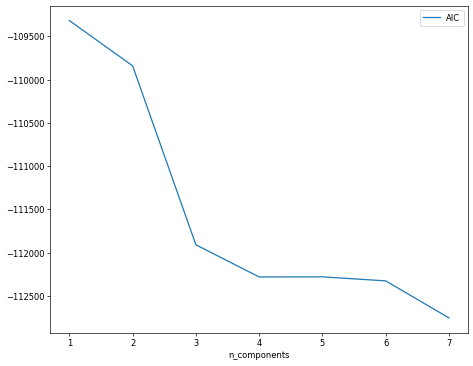

In [108]:
GM_n_components = np.arange(1, 8)
GM_models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(x_ica) for n in GM_n_components]

plt.figure(num=None, figsize=(8, 6), dpi=60, facecolor='w', edgecolor='r')
plt.plot(GM_n_components, [m.aic(x_ica) for m in GM_models], label='AIC')
plt.tight_layout()
plt.legend(loc='best')
plt.xlabel('n_components');

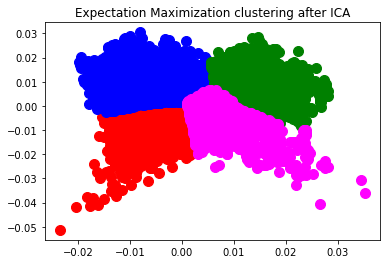

In [15]:
GM_n_classes = 4

GMcluster = mixture.GaussianMixture(n_components=GM_n_classes, covariance_type='full',random_state = 0)
GMcluster_fit = GMcluster.fit(x_ica)
GMlabels = GMcluster_fit.predict(x_ica)

plt.scatter(x_ica[GMlabels==0, 0], x_ica[GMlabels==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x_ica[GMlabels==1, 0], x_ica[GMlabels==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x_ica[GMlabels==2, 0], x_ica[GMlabels==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(x_ica[GMlabels==3, 0], x_ica[GMlabels==3, 1], s=100, c='magenta', label ='Cluster 3')

plt.title('Expectation Maximization clustering after ICA')
plt.show()

#### Expectation Maximization after Randomized Projections

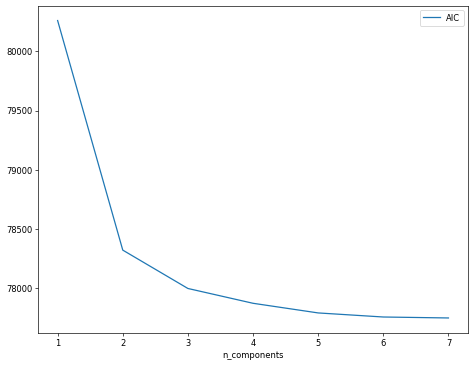

In [77]:
GM_n_components = np.arange(1, 8)
GM_models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(x_rp) for n in GM_n_components]

plt.figure(num=None, figsize=(8, 6), dpi=60, facecolor='w', edgecolor='r')
plt.plot(GM_n_components, [m.aic(x_rp) for m in GM_models], label='AIC')
plt.tight_layout()
plt.legend(loc='best')
plt.xlabel('n_components');

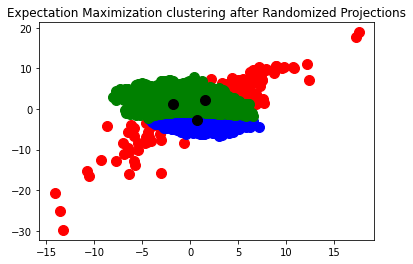

In [114]:
GM_n_classes = 3

GMcluster = mixture.GaussianMixture(n_components=GM_n_classes, covariance_type='full',random_state = 0)
GMcluster_fit = GMcluster.fit(x_rp)
GMlabels = GMcluster_fit.predict(x_rp)

plt.scatter(x_rp[GMlabels==0, 0], x_rp[GMlabels==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x_rp[GMlabels==1, 0], x_rp[GMlabels==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x_rp[GMlabels==2, 0], x_rp[GMlabels==2, 1], s=100, c='green', label ='Cluster 3')
#plt.scatter(x_rp[GMlabels==3, 0], x_rp[GMlabels==3, 1], s=100, c='magenta', label ='Cluster 3')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label = 'Centroids')
plt.title('Expectation Maximization clustering after Randomized Projections')
plt.show()

In [82]:
x_train_pca, x_test_pca = x_pca[:6132,:], x_pca[6132:,:]
print(x_train.shape, x_test.shape)
x_train_ica, x_test_ica = x_ica[:6132,:], x_ica[6132:,:]
print(x_train.shape, x_test.shape)
x_train_rp, x_test_rp = x_rp[:6132,:], x_rp[6132:,:]
print(x_train.shape, x_test.shape)

(6132, 12) (2628, 12)
(6132, 12) (2628, 12)
(6132, 12) (2628, 12)


In [34]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20, 
    restore_best_weights=True,
)

#### Neural Network after PCA

In [66]:
model = Sequential()

model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'selu', input_dim = 2))
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dropout(0.25))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dropout(0.5))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(x_train_pca, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
154/154 [==============================] - 2s 5ms/step - loss: 0.6913 - accuracy: 0.7158 - val_loss: 0.6948 - val_accuracy: 0.4156
Epoch 2/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6494 - accuracy: 0.8186 - val_loss: 0.6389 - val_accuracy: 0.6968
Epoch 3/150
154/154 [==============================] - 1s 4ms/step - loss: 0.3988 - accuracy: 0.8922 - val_loss: 0.6860 - val_accuracy: 0.6610
Epoch 4/150
154/154 [==============================] - 1s 4ms/step - loss: 0.3326 - accuracy: 0.8864 - val_loss: 0.6370 - val_accuracy: 0.6895
Epoch 5/150
154/154 [==============================] - 1s 4ms/step - loss: 0.3250 - accuracy: 0.8940 - val_loss: 0.6666 - val_accuracy: 0.6887
Epoch 6/150
154/154 [==============================] - 1s 4ms/step - loss: 0.3253 - accuracy: 0.8924 - val_loss: 0.6862 - val_accuracy: 0.6879
Epoch 7/150
154/154 [==============================] - 1s 4ms/step - loss: 0.3169 - accuracy: 0.8936 - val_loss: 0.6453 - val_accuracy: 0.7025

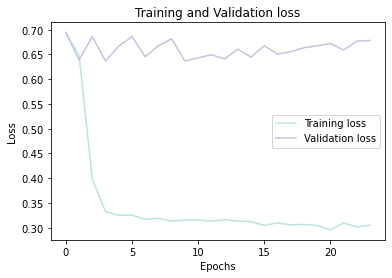

In [67]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

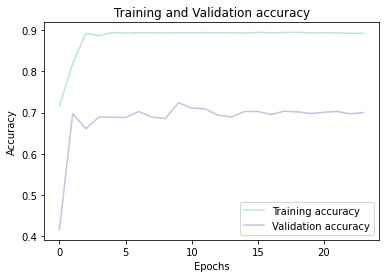

In [68]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

83/83 [==============================] - 0s 2ms/step


<AxesSubplot:>

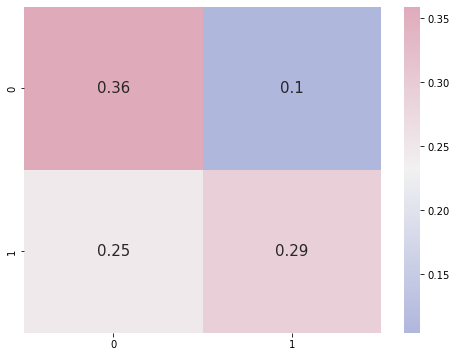

In [69]:
y_pred = model.predict(x_test_pca)
y_pred = (y_pred > 0.5)
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [70]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.77      0.67      1217
           1       0.74      0.54      0.62      1411

    accuracy                           0.65      2628
   macro avg       0.66      0.66      0.65      2628
weighted avg       0.67      0.65      0.65      2628

0.6495433789954338


#### Neural Network after ICA

In [61]:
model = Sequential()

model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'selu', input_dim = 2))
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dropout(0.25))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dropout(0.5))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(x_train_ica, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
154/154 [==============================] - 2s 6ms/step - loss: 0.6914 - accuracy: 0.7158 - val_loss: 0.6947 - val_accuracy: 0.4156
Epoch 2/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6744 - accuracy: 0.7158 - val_loss: 0.7297 - val_accuracy: 0.4156
Epoch 3/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6141 - accuracy: 0.7158 - val_loss: 0.8443 - val_accuracy: 0.4156
Epoch 4/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6053 - accuracy: 0.7158 - val_loss: 0.8677 - val_accuracy: 0.4156
Epoch 5/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6025 - accuracy: 0.7158 - val_loss: 0.8546 - val_accuracy: 0.4156
Epoch 6/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6012 - accuracy: 0.7158 - val_loss: 0.8591 - val_accuracy: 0.4156
Epoch 7/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6035 - accuracy: 0.7158 - val_loss: 0.8572 - val_accuracy: 0.4156

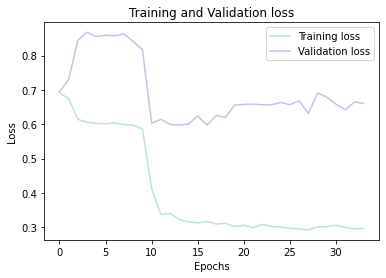

In [62]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

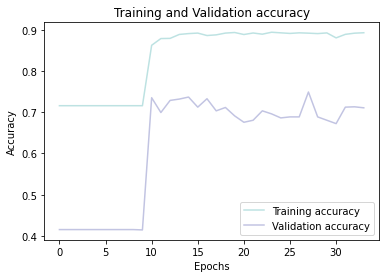

In [63]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

83/83 [==============================] - 0s 2ms/step


<AxesSubplot:>

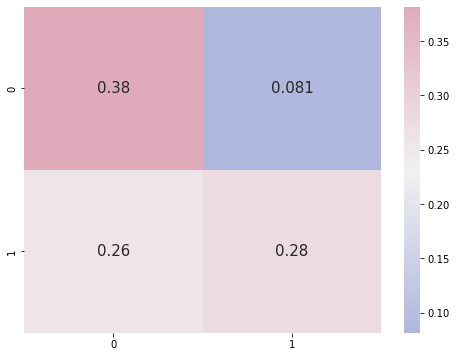

In [64]:
y_pred = model.predict(x_test_ica)
y_pred = (y_pred > 0.5)
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [65]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.82      0.69      1217
           1       0.77      0.52      0.62      1411

    accuracy                           0.66      2628
   macro avg       0.69      0.67      0.66      2628
weighted avg       0.69      0.66      0.65      2628

0.660958904109589


#### Neural Network after Randomized Projections

In [89]:
model = Sequential()

model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'selu', input_dim = 2))
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dropout(0.25))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dropout(0.5))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(x_train_rp, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
154/154 [==============================] - 2s 5ms/step - loss: 0.6913 - accuracy: 0.7158 - val_loss: 0.6948 - val_accuracy: 0.4156
Epoch 2/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6732 - accuracy: 0.7119 - val_loss: 0.7292 - val_accuracy: 0.4156
Epoch 3/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6093 - accuracy: 0.7085 - val_loss: 0.8025 - val_accuracy: 0.4222
Epoch 4/150
154/154 [==============================] - 1s 4ms/step - loss: 0.6016 - accuracy: 0.7150 - val_loss: 0.8126 - val_accuracy: 0.4156
Epoch 5/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5983 - accuracy: 0.7158 - val_loss: 0.8088 - val_accuracy: 0.4156
Epoch 6/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5979 - accuracy: 0.7087 - val_loss: 0.7290 - val_accuracy: 0.5012
Epoch 7/150
154/154 [==============================] - 1s 5ms/step - loss: 0.5965 - accuracy: 0.7036 - val_loss: 0.7391 - val_accuracy: 0.5020

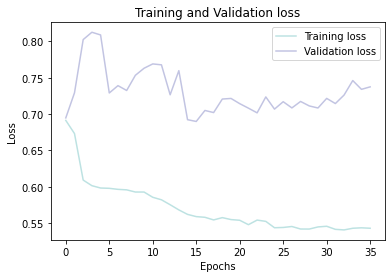

In [90]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

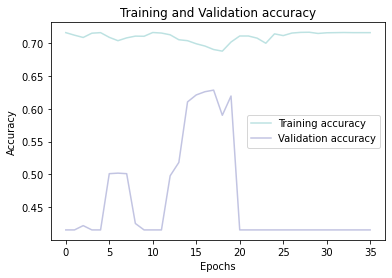

In [91]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

83/83 [==============================] - 0s 2ms/step


<AxesSubplot:>

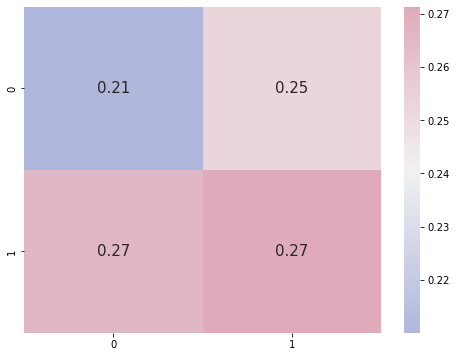

In [92]:
y_pred = model.predict(x_test_rp)
y_pred = (y_pred > 0.5)
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [93]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.45      0.45      1217
           1       0.52      0.51      0.51      1411

    accuracy                           0.48      2628
   macro avg       0.48      0.48      0.48      2628
weighted avg       0.48      0.48      0.48      2628

0.4813546423135464


#### Neural Network with Clustering results as Features and Class label as Output

In [ ]:
y_kmeans_train, y_kmeans_test = y_kmeans[:6132], y_kmeans[6132:]
print(y_kmeans_train.shape, y_kmeans_test.shape)

In [56]:
model = Sequential()

model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'selu', input_dim = 1))
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dropout(0.25))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dropout(0.5))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'selu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(y_kmeans_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
154/154 [==============================] - 2s 7ms/step - loss: 0.6914 - accuracy: 0.7152 - val_loss: 0.6948 - val_accuracy: 0.4156
Epoch 2/150
154/154 [==============================] - 1s 5ms/step - loss: 0.6691 - accuracy: 0.7158 - val_loss: 0.7329 - val_accuracy: 0.4156
Epoch 3/150
154/154 [==============================] - 1s 5ms/step - loss: 0.6011 - accuracy: 0.7158 - val_loss: 0.8318 - val_accuracy: 0.4156
Epoch 4/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5940 - accuracy: 0.7158 - val_loss: 0.8000 - val_accuracy: 0.4156
Epoch 5/150
154/154 [==============================] - 1s 5ms/step - loss: 0.5873 - accuracy: 0.7158 - val_loss: 0.8120 - val_accuracy: 0.4156
Epoch 6/150
154/154 [==============================] - 1s 5ms/step - loss: 0.5860 - accuracy: 0.7158 - val_loss: 0.8214 - val_accuracy: 0.4156
Epoch 7/150
154/154 [==============================] - 1s 5ms/step - loss: 0.5851 - accuracy: 0.7158 - val_loss: 0.8217 - val_accuracy: 0.4156

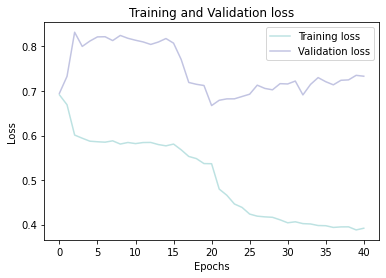

In [57]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

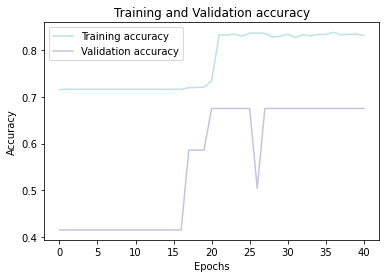

In [58]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

83/83 [==============================] - 0s 2ms/step


<AxesSubplot:>

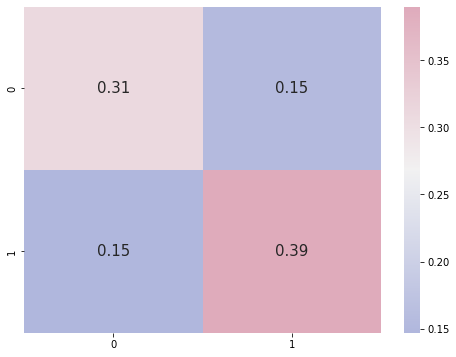

In [59]:
y_pred = model.predict(y_kmeans_test)
y_pred = (y_pred > 0.5)
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [60]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      1217
           1       0.72      0.73      0.72      1411

    accuracy                           0.70      2628
   macro avg       0.70      0.70      0.70      2628
weighted avg       0.70      0.70      0.70      2628

0.6993911719939118
